In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [64]:
!pip install pydicom

Show_dicom_image

/usr/local/lib/python3.7/dist-packages/pydicom/pixel_data_handlers/pillow_handler.py:239: UserWarning: The (0028,0101) 'Bits Stored' value (12-bit) doesn't match the JPEG 2000 data (16-bit). It's recommended that you change the 'Bits Stored' value
  f"The (0028,0101) 'Bits Stored' value ({bits_stored}-bit) "


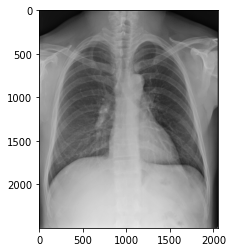

In [65]:
from numpy import genfromtxt
import pydicom as dicom
import matplotlib.pyplot as plt
path = '/content/4_325cc8b1e3c5e47c79b26c5e1772bcfd.dicom'
data = dicom.read_file(path)
my_data = data.pixel_array
plt.imshow(my_data, cmap="gray", vmin=0, vmax=4095)
plt.show()

Relabel

In [ ]:
import csv
import os
a = []
b = []
c = []
n=0
for i in os.listdir('/content/drive/MyDrive/ĐCLVTN/new_data_set'):
    d = i.replace('.dcm','')
    b.append(d)
with open("/content/stage_2_detailed_class_info.csv") as f:
    reader = csv.reader(f)
    for row in reader:
        if row[1] == 'Normal':
            c.append(row[0])
for l in b:
    for k in c:
        if l == k :
            a.append(l)
h = set(a)
path = '/content/drive/MyDrive/ĐCLVTN/new_data_set/'
for o in h:
    dst = path + '0_'+ o + '.dcm'
    src = path + o + '.dcm'
    os.rename(src,dst)


Create_numpy_12bit

In [ ]:
#concatenate,
from keras.backend import zeros
from PIL import Image
import pydicom as dicom
import numpy as np
import os,cv2
from random import shuffle

L = list()
M = list()
N = list()
P = list()
K = []

X = list()
for a in os.listdir('/content/drive/MyDrive/ĐCLVTN/new_data_set'):
  X.append(a)
shuffle(X)
print(len(X))
path = '/content/drive/MyDrive/ĐCLVTN/new_data_set/'
for p in X:
    dataset = dicom.read_file(path + p)
    my_data = dataset.pixel_array


    my_data1 = cv2.resize(my_data, (128,128))
    my_data2 = cv2.resize(my_data, (224,224))
    my_data3 = cv2.resize(my_data, (512,512))
    my_data4 = cv2.resize(my_data, (1024, 1024))

    #my_data_zero1 = zeros(my_data1.shape)

    my_data5 = np.stack((my_data1),axis = 0)
    my_data6 = np.stack((my_data2),axis = 0)
    my_data7 = np.stack((my_data3),axis = 0)
    my_data8 = np.stack((my_data4),axis = 0)

    my_data9 = my_data5.reshape(128,128,1)
    my_data10 = my_data6.reshape(224,224,1)
    my_data11 = my_data7.reshape(512,512,1)
    my_data12 = my_data8.reshape(1024,1024,1)
    
    my_label = label(p, '/content/drive/MyDrive/ĐCLVTN/vinbigdata/train.csv')

    L.append(my_data9)
    M.append(my_data10)
    N.append(my_data11)
    P.append(my_data12)
    K.append(my_label)

L = np.asarray(L)
M = np.asarray(M)
N = np.asarray(N)
P = np.asarray(P)
#K = np.asarray(K)

path = '/content/drive/MyDrive/ĐCLVTN/vinbigdata/1d/save_np/8bit/up1'
np.save(path+'/128/X.npy',L)
np.save(path+'/128/y.npy',K)
np.save(path+'/224/X.npy',M)
np.save(path+'/224/y.npy',K)
np.save(path+'/512/X.npy',N)
np.save(path+'/512/y.npy',K)
np.save(path+'/1024/X.npy',P)
np.save(path+'/1024/y.npy',K)
#print(K)

Eliminate_files_error

In [ ]:
import pydicom as dicom
import os
import shutil
n= 0
path1 = '/content/drive/MyDrive/ĐCLVTN/new_data_set/' #folder contain file before eliminate
path2 = '/content/drive/MyDrive/ĐCLVTN/error_new_dataset/' #folder contain file after eliminate
for a in os.listdir(path1):
    path = path1+ a
    data1 = dicom.read_file(path)
    data = data1.pixel_array
    if max(data[0]) == 0:
        n+=1
        print(max(data[0]))
        source = path
        dst = path2
        shutil.move(source, dst)
print(n)

Convert_dicom_data_to_image_data

In [ ]:
import numpy as np
import png, os, pydicom

source_folder = r'/content/drive/MyDrive/ĐCLVTN/vinbigdata/3_classes/image'  #path contain dicom data
output_folder = r'/content/drive/MyDrive/ĐCLVTN/vinbigdata/3_classes/image'  #path contain image data

def dicom2png(source_folder, output_folder):
    list_of_files = os.listdir(source_folder)
    for file in list_of_files:
        try:
            ds = pydicom.dcmread(os.path.join(source_folder,file))
            shape = ds.pixel_array.shape
            # Convert to float to avoid overflow or underflow losses.
            image_2d = ds.pixel_array.astype(float)
            # Rescaling grey scale between 0-255
            image_2d_scaled = (np.maximum(image_2d,0) / image_2d.max()) * 255.0
            # Convert to unit
            image_2d_scaled = np.uint8(image_2d_scaled)
            # Write the PNG file
            with open(os.path.join(output_folder,file)+'.png' , 'wb') as png_file:
                w = png.Writer(shape[1], shape[0], greyscale=True)
                w.write(png_file, image_2d_scaled)
        except:
            print('Could not convert: ', file)
dicom2png(source_folder, output_folder)

convert pixel to numpy_array

In [ ]:
from PIL import Image
import pydicom as dicom
import numpy as np
import os, cv2
from random import shuffle
import pylibjpeg
import gdcm


L = list()
M = list()
N = list()
K = []

X = list()
for a in os.listdir('/content/drive/MyDrive/ĐCLVTN/data_4classes/up1'):
    X.append(a)
shuffle(X)
print(len(X))
path = '/content/drive/MyDrive/ĐCLVTN/data_4classes/up1/'
for p in X:
    dataset = dicom.read_file(path + p)
    my_datax = dataset.pixel_array

    my_data1 = cv2.resize(my_datax, (128, 128))
    my_data2 = cv2.resize(my_datax, (224, 224))
    my_data3 = cv2.resize(my_datax, (512, 512))

    my_data5 = np.stack((my_data1), axis=0)
    my_data6 = np.stack((my_data2), axis=0)
    my_data7 = np.stack((my_data3), axis=0)

    my_data9 = my_data5.reshape(128, 128, 1)
    my_data10 = my_data6.reshape(224, 224, 1)
    my_data11 = my_data7.reshape(512, 512, 1)

    if p[0:2] == '1_':
        y = [1,0,0,0]
    elif p[0:2] == '2_':
        y = [0,1,0,0]
    elif p[0:2] == '3_':
        y = [0,0,1,0]
    elif p[0:2] == '4_':
        y = [0,0,0,1]
    L.append(my_data9)
    M.append(my_data10)
    N.append(my_data11)
    K.append(y)

L = np.asarray(L)
M = np.asarray(M)
N = np.asarray(N)

path = '/content/drive/MyDrive/ĐCLVTN/data_4classes/save_np'
np.save(path + '/128/X.npy', L)
np.save(path + '/128/y.npy', K)
np.save(path + '/224/X.npy', M)
np.save(path + '/224/y.npy', K)
np.save(path + '/512/X.npy', N)
np.save(path + '/512/y.npy', K)

print(K)

Create_numpy_8bit

In [ ]:
from PIL import Image
import pydicom as dicom
import numpy as np
import os, cv2
from random import shuffle
import pylibjpeg
import gdcm


L = list()
M = list()
N = list()
K = []

X = list()
for a in os.listdir('/content/drive/MyDrive/ĐCLVTN/data_4classes/up1'):
    X.append(a)
shuffle(X)
print(len(X))
path = '/content/drive/MyDrive/ĐCLVTN/data_4classes/up1/'
for p in X:
    dataset = dicom.read_file(path + p)
    my_datax = dataset.pixel_array
    my_data_8bit = (np.maximum(my_datax,0) / my_datax.max()) * 255.0
    my_datax = np.uint8(my_data_8bit)

    my_data1 = cv2.resize(my_datax, (128, 128))
    my_data2 = cv2.resize(my_datax, (224, 224))
    my_data3 = cv2.resize(my_datax, (512, 512))

    my_data5 = np.stack((my_data1), axis=0)
    my_data6 = np.stack((my_data2), axis=0)
    my_data7 = np.stack((my_data3), axis=0)

    my_data9 = my_data5.reshape(128, 128, 1)
    my_data10 = my_data6.reshape(224, 224, 1)
    my_data11 = my_data7.reshape(512, 512, 1)

    if p[0:2] == '1_':
        y = [1,0,0,0]
    elif p[0:2] == '2_':
        y = [0,1,0,0]
    elif p[0:2] == '3_':
        y = [0,0,1,0]
    elif p[0:2] == '4_':
        y = [0,0,0,1]
    L.append(my_data9)
    M.append(my_data10)
    N.append(my_data11)
    K.append(y)

L = np.asarray(L)
M = np.asarray(M)
N = np.asarray(N)

path = '/content/drive/MyDrive/ĐCLVTN/data_4classes/save_np'
np.save(path + '/128/X.npy', L)
np.save(path + '/128/y.npy', K)
np.save(path + '/224/X.npy', M)
np.save(path + '/224/y.npy', K)
np.save(path + '/512/X.npy', N)
np.save(path + '/512/y.npy', K)

print(K)

concatenate two array

In [ ]:
import numpy as np
a = 3
b = 128
c = 224
d = 512
e = 1024
path = '/content/drive/MyDrive/ĐCLVTN/image/up1_np'

x_train1 = np.load(path+'/'+str(b)+'/X.npy')
y_train1 = np.load(path+'/'+str(b)+'/y.npy')
print(x_train1.shape)
x_train2 = np.load(path+'/'+str(c)+'/X.npy')
y_train2 = np.load(path+'/'+str(c)+'/y.npy')
print(x_train2.shape)

x_train3 = np.load(path+'/'+str(d)+'/X.npy')
y_train3 = np.load(path+'/'+str(d)+'/y.npy')
print(x_train3.shape)



path2 = '/content/drive/MyDrive/ĐCLVTN/image/up2_np'
x_train5 = np.load(path2+'/'+str(b)+'/X.npy')
y_train5 = np.load(path2+'/'+str(b)+'/y.npy')
print(x_train5.shape)

x_train6 = np.load(path2+'/'+str(c)+'/X.npy')
y_train6 = np.load(path2+'/'+str(c)+'/y.npy')
print(x_train6.shape)

x_train7 = np.load(path2+'/'+str(d)+'/X.npy')
y_train7 = np.load(path2+'/'+str(d)+'/y.npy')
print(x_train7.shape)


#connected

x_train_sum1 = np.concatenate((x_train5, x_train1), axis=0)
y_train_sum1 = np.concatenate((y_train5, y_train1),axis =0)
print(x_train_sum1.shape)

x_train_sum2 = np.concatenate((x_train6, x_train2), axis=0)
y_train_sum2 = np.concatenate((y_train6, y_train2),axis =0)

x_train_sum3 = np.concatenate((x_train7, x_train3), axis=0)
y_train_sum3 = np.concatenate((y_train7, y_train3),axis =0)

path1 = '/content/drive/MyDrive/ĐCLVTN/image/sum'

np.save(path1+'/128/X.npy',x_train_sum1)
np.save(path1+'/128/y.npy',y_train_sum1)

np.save(path1+'/224/X.npy',x_train_sum2)
np.save(path1+'/224/y.npy',y_train_sum2)

np.save(path1+'/512/X.npy',x_train_sum3)
np.save(path1+'/512/y.npy',y_train_sum3)

print('done')

(1400, 128, 128, 3)
(1400, 224, 224, 3)
(1400, 224, 224, 3)
(2800, 128, 128, 3)
